In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from collections import defaultdict
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import math
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df_list = pd.read_csv('listings.csv')

After importing necesessary libraries and the dataset, we'll start to the project with examining the dataset as first step.

In [3]:
print(df_list.shape)

(3585, 95)


In [4]:
df_list.dtypes.value_counts()

object     62
float64    18
int64      15
dtype: int64

In [5]:
##The following code examines the name of the columns which are float64 data type
df_list.dtypes[df_list.dtypes=='float64']

neighbourhood_group_cleansed    float64
latitude                        float64
longitude                       float64
bathrooms                       float64
bedrooms                        float64
beds                            float64
square_feet                     float64
has_availability                float64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
review_scores_value             float64
license                         float64
jurisdiction_names              float64
reviews_per_month               float64
dtype: object

In [6]:
#The following code examines the name of the columns which are int64 data type
df_list.dtypes[df_list.dtypes=='int64']

id                                int64
scrape_id                         int64
host_id                           int64
host_listings_count               int64
host_total_listings_count         int64
accommodates                      int64
guests_included                   int64
minimum_nights                    int64
maximum_nights                    int64
availability_30                   int64
availability_60                   int64
availability_90                   int64
availability_365                  int64
number_of_reviews                 int64
calculated_host_listings_count    int64
dtype: object

In [7]:
#The following code examines the name of the columns which are object data type
pd.set_option('display.max_rows', 100)
df_list.dtypes[df_list.dtypes=='object']

listing_url                         object
last_scraped                        object
name                                object
summary                             object
space                               object
description                         object
experiences_offered                 object
neighborhood_overview               object
notes                               object
transit                             object
access                              object
interaction                         object
house_rules                         object
thumbnail_url                       object
medium_url                          object
picture_url                         object
xl_picture_url                      object
host_url                            object
host_name                           object
host_since                          object
host_location                       object
host_about                          object
host_response_time                  object
host_respon

In [8]:
#The following code examines the number of missing values in each column in descending order
df_list.isnull().sum().sort_values(ascending = False)

neighbourhood_group_cleansed        3585
jurisdiction_names                  3585
license                             3585
has_availability                    3585
square_feet                         3529
monthly_price                       2697
weekly_price                        2693
security_deposit                    2243
notes                               1975
interaction                         1554
access                              1489
neighborhood_overview               1415
host_about                          1309
transit                             1290
house_rules                         1192
cleaning_fee                        1107
space                               1057
review_scores_accuracy               823
review_scores_location               822
review_scores_value                  821
review_scores_checkin                820
review_scores_cleanliness            818
review_scores_communication          818
review_scores_rating                 813
reviews_per_mont

In [9]:
#The following code examines the columns names the columns that are without any missing values and all values are unique
df_list.nunique()[df_list.nunique()==len(df_list)]

id             3585
listing_url    3585
picture_url    3585
latitude       3585
longitude      3585
dtype: int64

In [10]:
#The following code examines the columns names with unique values as well as missing values with descending order
df_list.nunique()[df_list.nunique() != len(df_list)].sort_values(ascending=False)

name                                3504
description                         3423
summary                             3113
amenities                           3092
thumbnail_url                       2986
medium_url                          2986
xl_picture_url                      2986
space                               2268
host_id                             2181
host_url                            2181
host_thumbnail_url                  2174
host_picture_url                    2174
house_rules                         1928
transit                             1859
access                              1762
neighborhood_overview               1728
interaction                         1617
host_name                           1334
host_since                          1281
notes                               1269
host_about                          1240
street                              1239
first_review                         975
reviews_per_month                    644
last_review     

In [11]:
df_list['amenities'][0]

'{TV,"Wireless Internet",Kitchen,"Free Parking on Premises","Pets live on this property",Dog(s),Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials,Shampoo,"Laptop Friendly Workspace"}'

Question 1

One of the most vast detailed column within the dataset is 'amenities' column. Thus, we will focus on this column more than other columns at first. We will start to answer the question: 
What are the most common amenities within Boston Airbnb dataset? 

Let's start!

In [12]:
#Firstly, create an empty list to fill with amenities available.
list_amenities = []

#Then, create a 'for' loop to append all amenity values from the dataset into the list.
for i in range(len(df_list)):
    list_amenities.append(df_list['amenities'][i])

    
#Due to the fact that each list within the dataset has a list of amenities, we need to retrieve unique amenities from the dataset
#Therefore, we will use the "set" function to set the amenities unique and then convert the set into a list
#to remain consistency of data type.
list_amenities = list((s.strip('\'\{\}') for s in list_amenities))
list_amenities_string = ",".join(list_amenities)
list_amenities = list(set(list_amenities_string.split(",")))

#Now we need to remove each empty string within the list of amenities 
without_empty_amenities = []
for string in list_amenities:
    if (string != ""):
        without_empty_amenities.append(string)
list_amenities = without_empty_amenities

In [13]:
#The code snippet below is taken from one of the Udacity lecture notes. 
#This function is used to count the number of listings that contains each amenity in the amenities list.
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of amenities
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the amenity is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

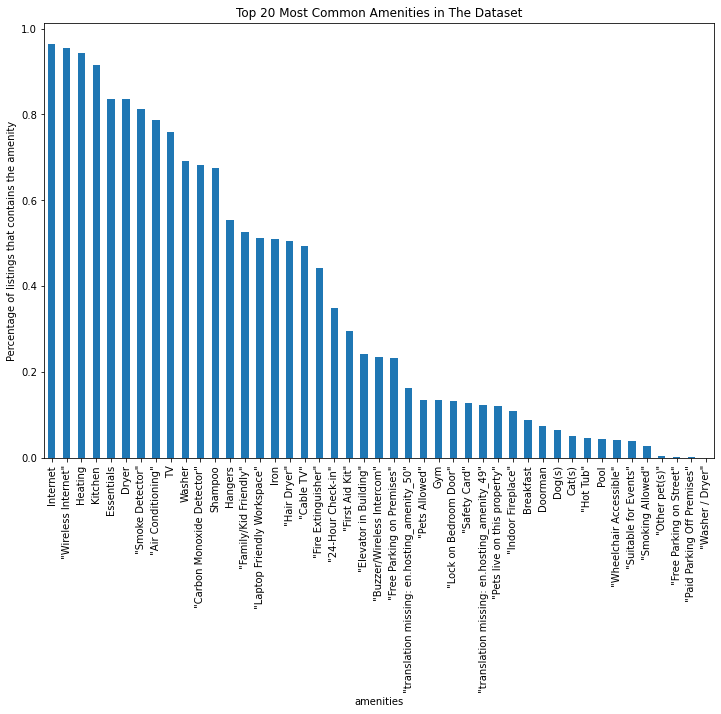

In [14]:
#We will create a new dataframe which is called named 'amenities_common', which has lists of amenities as one column and the count of these amenities lists
#in our main (df_list)
amenities_common = df_list['amenities'].value_counts().reset_index()
amenities_common.rename(columns={'index': 'amenities', 'amenities': 'count'}, inplace=True)

#Counting the number of listings that contains each amenity in the amenities list via total_count function.
amenities_common_df = total_count(amenities_common, 'amenities', 'count', list_amenities)
amenities_common_df.set_index('amenities', inplace=True)

#Visualizing the percentage of each amenity with ascending sort as a bar chart 
(amenities_common_df/len(df_list)).plot(kind='bar', figsize=(12,8), legend=None);
plt.title('Top 20 Most Common Amenities in The Dataset');
plt.ylabel('Percentage of listings that contains the amenity')

plt.show()

In [15]:
amenities_common_df.head()

,count
amenities,
Internet,3459
"""Wireless Internet""",3421
Heating,3384
Kitchen,3284
Essentials,2994


Question 2

In this part, we will try to find answers for this questions:
What attracts people most to rent a property? Price? Neighborhood? or Offered amenities?


In [16]:
#We will focus on 90 days period for availability and booking ratio
df_list['availability_90']

0        0
1       84
2       61
3       26
4       59
        ..
3580    81
3581    89
3582    40
3583     5
3584    75
Name: availability_90, Length: 3585, dtype: int64

In [17]:
#Checking missing values within the 'availability_90' column
df_list['availability_90'].isnull().sum()

0

In [18]:
#Yet it doesn't have any missing values, we can define our booking ratio column for 90 days
df_list['booking_ratio_90'] = 1 - (df_list['availability_90']/90)

In [19]:
df_list['booking_ratio_90']

0       1.000000
1       0.066667
2       0.322222
3       0.711111
4       0.344444
          ...   
3580    0.100000
3581    0.011111
3582    0.555556
3583    0.944444
3584    0.166667
Name: booking_ratio_90, Length: 3585, dtype: float64

In [20]:
#Now, we can examine booking ratio for next 90 days for different pricing and neighbourhoods
df_list.groupby(['price','neighbourhood_cleansed'])['booking_ratio_90'].mean().sort_values(ascending=False)

price      neighbourhood_cleansed
$27.00     Allston                   1.0
$298.00    Fenway                    1.0
$30.00     Mission Hill              1.0
           Fenway                    1.0
           East Boston               1.0
                                    ... 
$145.00    Brighton                  0.0
$119.00    West End                  0.0
$113.00    Allston                   0.0
$110.00    Downtown                  0.0
$1,000.00  Charlestown               0.0
Name: booking_ratio_90, Length: 1542, dtype: float64

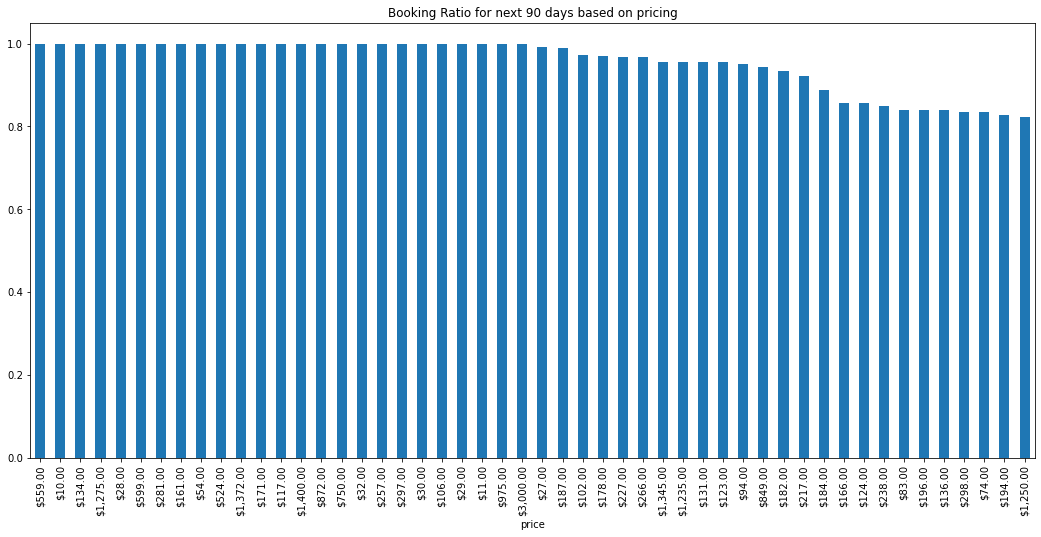

In [21]:
#Visualizing the booking ratio difference for spectrum of prices for next 90 days as a bar chart
(df_list.groupby(['price'])['booking_ratio_90'].mean().sort_values(ascending=False))[:50].plot(kind='bar',
    figsize=(18,8))
plt.title('Booking Ratio for next 90 days based on pricing');
plt.show()

Conclusion: There is no significant correlation between pricing and booking ratio

In [22]:
#Checking missing values withing the 'neighbourhood_cleansed' column 
 
df_list['neighbourhood_cleansed'].isnull().sum()

0

In [23]:
#The number of each unique values in the 'neighbourhood_cleansed' column.
df_list['neighbourhood_cleansed'].value_counts().sort_values(ascending=False)

Jamaica Plain              343
South End                  326
Back Bay                   302
Fenway                     290
Dorchester                 269
Allston                    260
Beacon Hill                194
Brighton                   185
South Boston               174
Downtown                   172
East Boston                150
Roxbury                    144
North End                  143
Mission Hill               124
Charlestown                111
South Boston Waterfront     83
Chinatown                   71
Roslindale                  56
West End                    49
West Roxbury                46
Hyde Park                   31
Mattapan                    24
Bay Village                 24
Longwood Medical Area        9
Leather District             5
Name: neighbourhood_cleansed, dtype: int64

In [24]:
#Listing the booking ratios of different neighbourhoods for next 90 days
df_list.groupby(['neighbourhood_cleansed'])['booking_ratio_90'].mean().sort_values(ascending=False)

neighbourhood_cleansed
North End                  0.711033
Beacon Hill                0.692612
Allston                    0.689829
Mission Hill               0.664516
South End                  0.651534
Jamaica Plain              0.631163
Leather District           0.611111
Brighton                   0.609610
Hyde Park                  0.579928
South Boston               0.573627
Downtown                   0.553811
Charlestown                0.553253
Back Bay                   0.538116
Roxbury                    0.537963
Longwood Medical Area      0.535802
Roslindale                 0.515278
Dorchester                 0.500991
East Boston                0.493704
Fenway                     0.486705
South Boston Waterfront    0.452878
West Roxbury               0.445169
Bay Village                0.385648
Mattapan                   0.373611
Chinatown                  0.286072
West End                   0.242857
Name: booking_ratio_90, dtype: float64

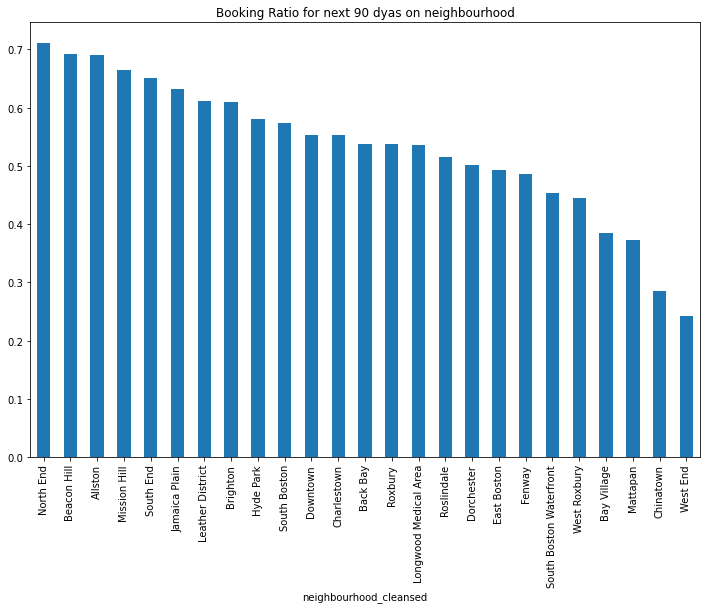

In [25]:
#Visualizing the booking ratio difference for spectrum of neighbourhoods for next 90 days as a bar chart
(df_list.groupby(['neighbourhood_cleansed'])['booking_ratio_90'].mean().sort_values(ascending=False)).plot(kind='bar',
    figsize=(12,8))
plt.title('Booking Ratio for next 90 dyas on neighbourhood');
plt.show()

Conclusion: We can observe that some neighbourhood has higher booking ration and consecutively more demand than others.

In [26]:
#Below code shows the unique review scores rating of rentals and count of each one
df_list['review_scores_rating'].value_counts().sort_values(ascending=False)

100.0    628
93.0     205
96.0     197
95.0     171
97.0     168
90.0     163
80.0     160
98.0     153
94.0     109
92.0     105
91.0      88
87.0      87
88.0      69
99.0      65
89.0      56
86.0      47
85.0      39
84.0      34
60.0      33
83.0      30
70.0      19
75.0      16
82.0      16
73.0      14
78.0      12
40.0      11
79.0      10
77.0       9
76.0       7
81.0       7
20.0       6
74.0       5
64.0       5
67.0       4
71.0       4
65.0       3
50.0       3
68.0       2
47.0       2
66.0       2
58.0       1
55.0       1
69.0       1
62.0       1
53.0       1
72.0       1
48.0       1
46.0       1
Name: review_scores_rating, dtype: int64

In [27]:
#Checking missing values for the 'amenities' column
df_list['amenities'].isnull().sum()

0

In [28]:
#Creating new columns for each of the amenities and fill them all with zeros
for i in range(len(list_amenities)):
    df_list[list_amenities[i]] = 0

In [29]:
#Now filling the new amenities columns 
#Firstly, checking if the listing has that amenity.
#If the listing has that amenity, I fill it with '1'; and if not, fill it with '0'.
for i in range(len(list_amenities)):
    for t in range(len(df_list)):
        if list_amenities[i] in df_list['amenities'][t]:
            df_list.loc[t , list_amenities[i]] = 1
        else:
            df_list.loc[t , list_amenities[i]] = 0

In [30]:
#Now, creating a dataframe that will contain information about booking ratio of listings that contain that specific amenity.

a_impact = pd.DataFrame(index=range(0,len(list_amenities)), columns = ["Amenity Name", "Booking ratio with amenity", "Booking ratio without amenity", "Booking Difference"])


#In the below for loop, I write the name of the amenity, calculate the booking ratio of listings that contain that specific amenitiy
#and calculate the booking ratio of listings that do not contain that specific amenity
#and calculate the difference between booking ratios for that specific amenity. 
for i in range(len(list_amenities)):
    a_impact['Amenity Name'][i] = list_amenities[i]
    a_impact['Booking ratio with amenity'][i] = df_list.groupby([list_amenities[i]])['booking_ratio_90'].mean()[1]
    a_impact['Booking ratio without amenity'][i] = df_list.groupby([list_amenities[i]])['booking_ratio_90'].mean()[0]
    a_impact['Booking Difference'][i] = a_impact['Booking ratio with amenity'][i] - a_impact['Booking ratio without amenity'][i]

a_impact.set_index('Amenity Name', inplace=True)

In [31]:
#Listing the most 15 booking difference to identify which amenities are mostly prefered by guests.
a_impact.sort_values(by='Booking Difference', ascending = False)[:15]

,Booking ratio with amenity,Booking ratio without amenity,Booking Difference
Amenity Name,,,
"""Other pet(s)""",0.7375,0.570832,0.166668
"""Smoke Detector""",0.59571,0.467343,0.128367
"""Buzzer/Wireless Intercom""",0.639041,0.550963,0.0880782
"""Hot Tub""",0.625416,0.568945,0.0564704
"""Wheelchair Accessible""",0.615165,0.569699,0.0454661
"""Fire Extinguisher""",0.596411,0.551961,0.0444501
Kitchen,0.575277,0.531192,0.0440851
"""Lock on Bedroom Door""",0.607431,0.566113,0.0413178
"""Smoking Allowed""",0.607836,0.570589,0.0372473


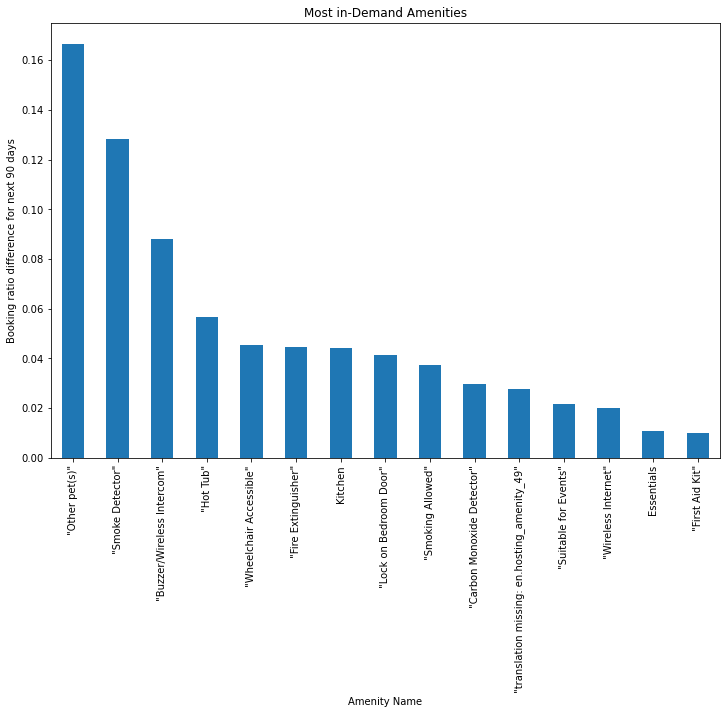

In [32]:
#Visualizing most preferred 15 amenities by booking difference.
a_impact['Booking Difference'].sort_values(ascending = False)[:15].plot(kind='bar', figsize=(12,8), legend=None)
plt.title('Most in-Demand Amenities');
plt.ylabel('Booking ratio difference for next 90 days')
plt.show()

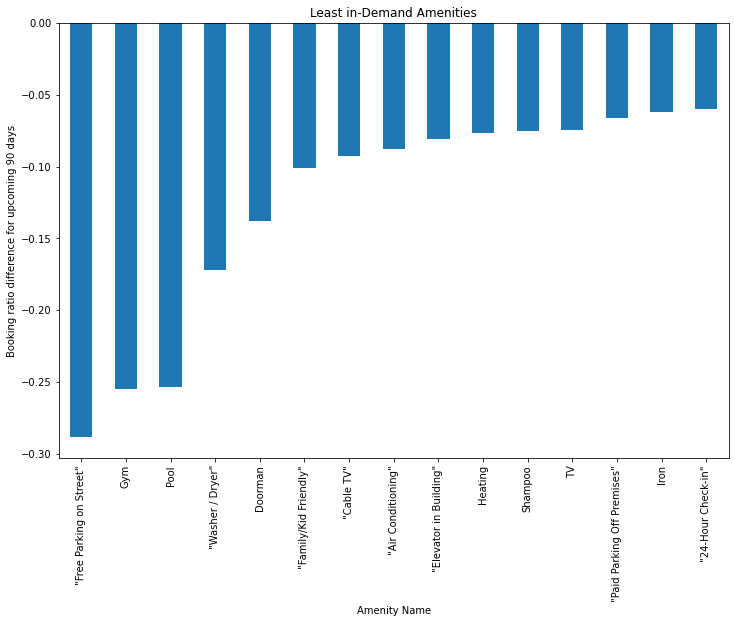

In [33]:
#Visualizing the least preferred 15 amenities by booking difference.
a_impact['Booking Difference'].sort_values(ascending = True)[:15].plot(kind='bar', figsize=(12,8), legend=None)
plt.title('Least in-Demand Amenities');
plt.ylabel('Booking ratio difference for upcoming 90 days')
plt.show()

Question 3

As a last part of this project, we will train a machine learning model in order to forecast pricing of the listings. The last question to answer is:

What are the most effectual traits to forecast pricing of a listing? 


Firstly, we should identify the number of missing values in the features that are relavant to price.

In [34]:
print(df_list['price'].isnull().sum())
print(df_list['weekly_price'].isnull().sum())
print(df_list['monthly_price'].isnull().sum())
print(df_list['security_deposit'].isnull().sum())
print(df_list['cleaning_fee'].isnull().sum())

0
2693
2697
2243
1107


In [35]:
#Listing of features that are expected to be essential for forecasting the pricing of listings
#Creating a new dataframe for listings

#Here is the columns for amenities categorical value

selected_features = ['bathrooms', 'bedrooms', 'beds', 'latitude', 'longitude', 'reviews_per_month',
        'booking_ratio_90', 'accommodates', 'guests_included', '"24-Hour Check-in"', '"Suitable for Events"',
       '"Pets live on this property"', '"Smoking Allowed"',
       '"Other pet(s)"', 'Essentials', '"Wireless Internet"',
       '"Buzzer/Wireless Intercom"', 'TV', 'Gym', 'Washer', 'Doorman', 'Dryer',
       '"Air Conditioning"', '"Pets Allowed"', 'Dog(s)',
       '"Hair Dryer"', '"Fire Extinguisher"', 'Breakfast', '"Washer / Dryer"',
       '"Laptop Friendly Workspace"', '"Free Parking on Premises"',
       '"Lock on Bedroom Door"', 'Hangers', '"Family/Kid Friendly"',
       '"Carbon Monoxide Detector"', '"Safety Card"', 'Kitchen',
       '"Elevator in Building"', 'Internet', 'Shampoo', '"Smoke Detector"',
       '"Paid Parking Off Premises"', '"First Aid Kit"',
       '"Indoor Fireplace"', '"Cable TV"', 'Heating', 'neighbourhood_cleansed',
        'property_type','room_type','bed_type','price','security_deposit',
        'cleaning_fee', 'extra_people', 'instant_bookable', 'cancellation_policy']

df_list_ml = df_list[selected_features]

In [36]:
#Checking missing values for each columns

df_list_ml.isnull().sum()[df_list_ml.isnull().sum()>0]

bathrooms              14
bedrooms               10
beds                    9
reviews_per_month     756
property_type           3
security_deposit     2243
cleaning_fee         1107
dtype: int64

In [37]:
#Replacing missing values of these features with the mean values of each feature in the dataset 
#Because these four columns below are consisted of numeric data.

df_list_ml['bathrooms'].fillna(df_list_ml['bathrooms'].mean(), inplace=True)
df_list_ml['bedrooms'].fillna(df_list_ml['bedrooms'].mean(), inplace=True)
df_list_ml['beds'].fillna(df_list_ml['beds'].mean(), inplace=True)
df_list_ml['reviews_per_month'].fillna(df_list_ml['reviews_per_month'].mean(), inplace=True)

In [38]:
#Replacing missing values of property_type with mode value of the feature in the dataset.
#Because this column below is consisted of string data.
df_list_ml['property_type'].fillna(df_list_ml['property_type'].mode()[0], inplace=True)

In [39]:
#Replacing missing values of these features with zeros.
#Because missing value means 0 value for these columns below

df_list_ml['security_deposit'].fillna(0, inplace=True)
df_list_ml['cleaning_fee'].fillna(0, inplace=True)

In [40]:
df_list_ml.dtypes

bathrooms                       float64
bedrooms                        float64
beds                            float64
latitude                        float64
longitude                       float64
reviews_per_month               float64
booking_ratio_90                float64
accommodates                      int64
guests_included                   int64
"24-Hour Check-in"                int64
"Suitable for Events"             int64
"Pets live on this property"      int64
"Smoking Allowed"                 int64
"Other pet(s)"                    int64
Essentials                        int64
"Wireless Internet"               int64
"Buzzer/Wireless Intercom"        int64
TV                                int64
Gym                               int64
Washer                            int64
Doorman                           int64
Dryer                             int64
"Air Conditioning"                int64
"Pets Allowed"                    int64
Dog(s)                            int64


In [41]:
#Removing $ signs and comma signs 

df_list_ml['price'] = df_list_ml['price'].str.replace('$', '')
df_list_ml['security_deposit'] = df_list_ml['security_deposit'].str.replace('$', '')
df_list_ml['cleaning_fee'] = df_list_ml['cleaning_fee'].str.replace('$', '')
df_list_ml['extra_people'] = df_list_ml['extra_people'].str.replace('$', '')

df_list_ml['price'] = df_list_ml['price'].str.replace(',', '')
df_list_ml['security_deposit'] = df_list_ml['security_deposit'].str.replace(',', '')
df_list_ml['cleaning_fee'] = df_list_ml['cleaning_fee'].str.replace(',', '')
df_list_ml['extra_people'] = df_list_ml['extra_people'].str.replace(',', '')

#Filling NaN values with 0 
df_list_ml['security_deposit'].fillna(0, inplace=True)
df_list_ml['cleaning_fee'].fillna(0, inplace=True)

In [42]:
#Altering data types to float from string
df_list_ml['price'] = df_list_ml['price'].astype(float)
df_list_ml['security_deposit'] = df_list_ml['security_deposit'].astype(float)
df_list_ml['cleaning_fee'] = df_list_ml['cleaning_fee'].astype(float)
df_list_ml['extra_people'] = df_list_ml['extra_people'].astype(float)

In [43]:
#Establishing a new dataframe as a subset of categorical columns from df_list_ml dataframe
cat_cols = df_list_ml.select_dtypes(include=['object'])

In [44]:
cat_cols.head()

,neighbourhood_cleansed,property_type,room_type,bed_type,instant_bookable,cancellation_policy
0,Roslindale,House,Entire home/apt,Real Bed,f,moderate
1,Roslindale,Apartment,Private room,Real Bed,t,moderate
2,Roslindale,Apartment,Private room,Real Bed,f,moderate
3,Roslindale,House,Private room,Real Bed,f,moderate
4,Roslindale,House,Private room,Real Bed,f,flexible


In [45]:
#Creating new columns from categorical variables to use these features in ML regression algorithm.
for col in cat_cols:
    try:
        df_list_ml = pd.concat([df_list_ml.drop(col, axis=1), pd.get_dummies(df_list_ml[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
    except:
        continue

In [46]:
#Establishing the X (features) and y (the variable to be modelled) dataframes
y = df_list_ml['price']
X = df_list_ml.drop(columns='price')

In [47]:
#Splitting the new dataframes into train and test dataframes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [48]:
#Applying the linear regression, fitting the model, making predictions with the test set and scoring the success of the model
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

print(test_score)
print(train_score)





0.28210797069347415
0.45075261994946114


In [49]:
#Below function is taken from one of the Udacity jupyter notebook examples. I used this code to see coefficients of my model. 
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

In [50]:
coef_df.head(20)

,est_int,coefs,abs_coefs
4,longitude,507.996000,507.996000
3,latitude,339.494513,339.494513
28,"""Washer / Dryer""",323.384487,323.384487
75,property_type_Camper/RV,-142.456839,142.456839
94,cancellation_policy_super_strict_30,80.974719,80.974719
69,neighbourhood_cleansed_South Boston Waterfront,80.175258,80.175258
50,neighbourhood_cleansed_Bay Village,67.535008,67.535008
86,room_type_Shared room,-65.329100,65.329100
49,neighbourhood_cleansed_Back Bay,64.031890,64.031890
57,neighbourhood_cleansed_East Boston,-59.791710,59.791710


In [51]:
def find_optimal_number_of_selectors(X, y, k_samples, plot=True, legend=True):
    '''
    INPUT:
    X dataframe that contains the features.
    y dataframe that contains the variable to be predicted.
    k_samples is a list of k values that will be tested.
    
    OUTPUT:
    A dictionary that contains values of tested k-values as keys and r-squared values for each key.
    The k-value that has the highest r-squared.

    '''   
    result_r_squareds = []
    results = {}
    for kes in k_samples:
        selector = SelectKBest(score_func=f_regression, k=kes)
        selector.fit_transform(X, y)
        selected_cols = selector.get_support(indices=True)
        features_new_X = X.iloc[:,selected_cols]
        
        X_train, X_test, y_train, y_test = train_test_split(features_new_X, y, test_size = 0.3, random_state=42)
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        result_r_squareds.append(r2_score(y_test, y_test_preds))
        results[str(kes)] = r2_score(y_test, y_test_preds)
    
    if plot:
        plt.plot(k_samples, result_r_squareds, label="r-squared", alpha=0.7)
        plt.xlabel("Different k_values")
        plt.ylabel("R_Squared_Values")
        plt.legend(loc=1)
        plt.show()
    
    best_k = max(results, key=results.get)
    
    return results, best_k

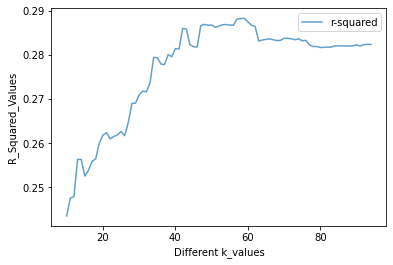

{'10': 0.24352182852167525, '11': 0.24759540808542257, '12': 0.24789003295648915, '13': 0.2563451162861311, '14': 0.2563399708197399, '15': 0.2525737080358369, '16': 0.25385487219663283, '17': 0.25588444496224383, '18': 0.2564935286012261, '19': 0.260007634033495, '20': 0.2618467100960644, '21': 0.26242914511268467, '22': 0.26100311265546405, '23': 0.2615417728469468, '24': 0.26189023200299244, '25': 0.2626663494074758, '26': 0.26172309950857464, '27': 0.26472016713094515, '28': 0.26903115313032566, '29': 0.2690832742061926, '30': 0.27097221678550953, '31': 0.2717863929335377, '32': 0.2716620369169499, '33': 0.27371536075805325, '34': 0.2794647430051278, '35': 0.27940708834466443, '36': 0.27796325035109914, '37': 0.2778225349989055, '38': 0.2800790227256127, '39': 0.27962275301843, '40': 0.2814627013165768, '41': 0.2813307716553016, '42': 0.286016536481589, '43': 0.28590199015258555, '44': 0.28231596284702287, '45': 0.2818889863613431, '46': 0.2817941660821931, '47': 0.2866697969410235

In [52]:
#Testing a range of k values from 10 to 94 (which is the number of all features) to find the number of features generate the highest r-squared value.
k_samples = range(10, len(X.columns))
k_results, best_k = find_optimal_number_of_selectors(X, y, k_samples)
print(k_results)
print(best_k)
print(k_results[best_k])